In [3]:
from sklearn.datasets import load_breast_cancer, load_digits
from sklearn.datasets import load_iris,load_wine
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_mutual_info_score
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import time

##  data load & preprocessiong

In [9]:
data = load_digits()
X, y = data.data, data.target
print(X.shape[0], X.shape[1])

1797 64


In [10]:
print(X)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [11]:
random_seed = 0
np.random.seed(random_seed)
#X = preprocessing.scale(X)

In [67]:
values, counts = np.unique(y, return_counts=True)
print(values)
print(counts)
print(len(values))

[0 1 2 3 4 5 6 7 8 9]
[178 182 177 183 181 182 181 179 174 180]
10


# Clustering without Dimentionality Reduction

## 1. K-means

In [53]:
k_grid = np.arange (2,X.shape[1]+1)
loss = np.zeros(k_grid.size)
for idx, k in enumerate(k_grid):
    kmeans = KMeans(n_clusters=k, random_state=random_seed)
    kmeans.fit(X)
    loss[idx] = kmeans.inertia_
print(loss)

[1914619.6175501  1730182.90314416 1609541.1931971  1497583.44830439
 1409236.63150019 1336480.79952026 1265306.42319361 1202324.50008745
 1165218.71557878 1134937.84007755 1103792.0983473  1070969.41351405
 1051569.54686747 1019153.13988153  999677.48155453  985749.84952517
  970734.43296817  951403.08304824  937951.36602673  926396.20783639
  917315.9136322   903339.1998197   893449.53743247  885484.23331645
  876375.58146719  866831.95058918  857851.02970436  849156.26970531
  841070.12490546  831956.0150545   822896.65021837  815034.54411729
  804165.44555669  798161.41640353  790146.34730799  786841.04880458
  778020.74796591  769691.03341358  764827.79198321  758514.30544113
  752311.9439887   747515.15359528  743821.91283659  737604.80294611
  733198.62173415  729440.30342404  723059.09060772  715479.27770704
  714716.76856007  710312.38443623  705686.93243368  702510.20736381
  697892.04715034  692444.00606033  689334.03712737  686351.49949534
  680943.1548487   677402.33482272

Text(0.5, 1.0, 'Dataset 2: Digits')

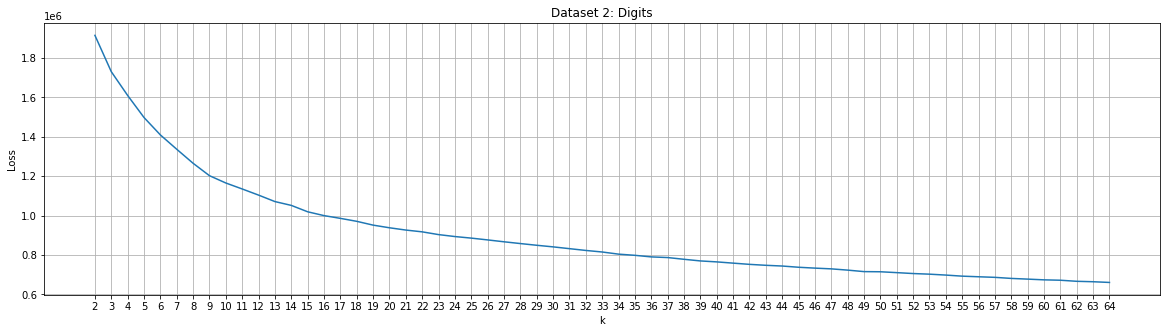

In [54]:
#plt.figure()
plt.figure(figsize=(20,5))
plt.plot(k_grid, loss)
plt.grid()
plt.xlabel('k')
plt.ylabel('Loss')
plt.xticks(np.arange(2, 65))
plt.title('Dataset 2: Digits')

### Cluster visualization

******** kmeans (k = 13) ********
inertia:  1070969.4135140528
silhouette_score:  0.18510352092106255
adjusted_mutual_info_score:  0.7749173524037436


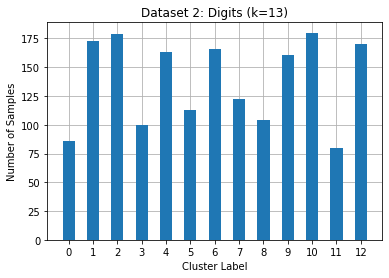

In [64]:
k = 13 #elbow method
kmeans = KMeans(n_clusters = k, random_state = random_seed, max_iter = 300)
kmeans.fit(X)
print ("******** kmeans (k = 13) ********")
print("inertia: ", kmeans.inertia_)
score = silhouette_score(X, kmeans.labels_)
print("silhouette_score: ", score)
ami = adjusted_mutual_info_score(y,kmeans.labels_)
print("adjusted_mutual_info_score: ", ami)

plt.figure()
plt.hist(kmeans.labels_, bins = np.arange(0,k+1) - .5, rwidth=.5, zorder = 2)
plt.xticks(np.arange(0,k))
plt.xlabel('Cluster Label')
plt.ylabel('Number of Samples')
plt.title('Dataset 2: Digits (k=13)')
plt.grid()

******** kmeans (k = 15) ********
inertia:  1019153.1398815259
silhouette_score:  0.18716263987727666
adjusted_mutual_info_score:  0.7834407136062963


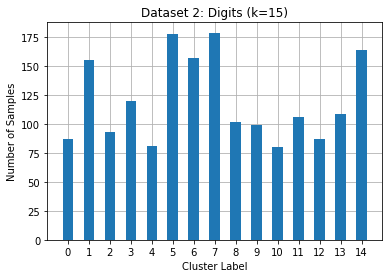

In [63]:
k = 15 #elbow method
kmeans = KMeans(n_clusters = k, random_state = random_seed, max_iter = 300)
kmeans.fit(X)
print ("******** kmeans (k = 15) ********")
print("inertia: ", kmeans.inertia_)
score = silhouette_score(X, kmeans.labels_)
print("silhouette_score: ", score)
ami = adjusted_mutual_info_score(y,kmeans.labels_)
print("adjusted_mutual_info_score: ", ami)

plt.figure()
plt.hist(kmeans.labels_, bins = np.arange(0,k+1) - .5, rwidth=.5, zorder = 2)
plt.xticks(np.arange(0,k))
plt.xlabel('Cluster Label')
plt.ylabel('Number of Samples')
plt.title('Dataset 2: Digits (k=15)')
plt.grid()

******** kmeans (k = 10) ********
inertia:  1165218.7155787845
silhouette_score:  0.18249069204151275
adjusted_mutual_info_score:  0.7417664506416767


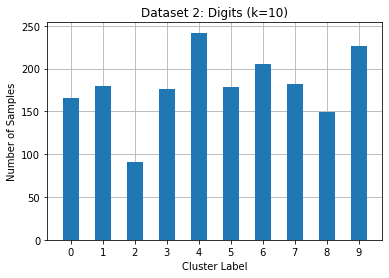

In [65]:
k = 10 #elbow method
kmeans = KMeans(n_clusters = k, random_state = random_seed, max_iter = 300)
kmeans.fit(X)
print ("******** kmeans (k = 10) ********")
print("inertia: ", kmeans.inertia_)
score = silhouette_score(X, kmeans.labels_)
print("silhouette_score: ", score)
ami = adjusted_mutual_info_score(y,kmeans.labels_)
print("adjusted_mutual_info_score: ", ami)

plt.figure()
plt.hist(kmeans.labels_, bins = np.arange(0,k+1) - .5, rwidth=.5, zorder = 2)
plt.xticks(np.arange(0,k))
plt.xlabel('Cluster Label')
plt.ylabel('Number of Samples')
plt.title('Dataset 2: Digits (k=10)')
plt.grid()

## 2 Expectation Maximization (EM) - GMM

In [39]:
n_component_grid = np.arange (1,X.shape[1]+1)

# bayesian information criterion
bic = np.zeros(n_component_grid.size)
for idx, n in enumerate(n_component_grid):
    gmm = GaussianMixture(n_components = n, random_state = random_seed)
    gmm.fit(X)
    bic[idx]=gmm.bic(X)
print(bic)   

[366728.35246245 240679.6596158  165810.4440488  167910.31353285
 168850.31028151 194416.72127345 216756.82325111 196304.17149838
 189490.0434445  199729.58728733 215690.33561215 220002.62283009
 220715.3957233  224342.05312163 230820.2486995  250690.09535358
 259314.31813997 268763.52659885 277740.89857035 285202.53303394
 300064.69697836 312637.12344531 318441.06038438 325953.36133266
 323396.95487851 334437.00077014 344992.65168093 346508.14390997
 364821.07968898 363409.68445987 366500.21510837 377992.95360917
 386667.74996055 391792.37837406 396145.68186744 392041.34036073
 395094.95601145 401695.37523922 402019.73663924 407555.95881042
 411009.36477889 422077.35999304 422969.74223799 428382.80761513
 431487.70249826 431982.49309434 435324.44880568 439799.72770719
 440103.81600371 449116.8851789  454887.29115442 459360.70091655
 460438.21583803 460338.65051663 489353.12771488 490933.04660978
 491331.65536139 493027.84514755 499662.67504269 505780.61253337
 515089.28770116 518583.8

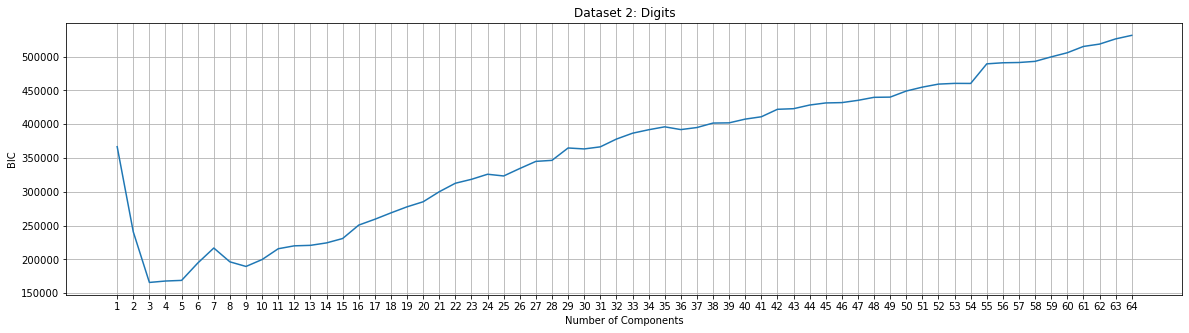

In [40]:
plt.figure(figsize=(20,5))
plt.plot(n_component_grid,bic)
plt.xlabel('Number of Components')
plt.ylabel('BIC')
plt.title('Dataset 2: Digits')
plt.xticks(np.arange(1,X.shape[1]+1))
plt.grid()

In [41]:
n_best = n_component_grid[np.argmin(bic)]
print("Optimal Number of Components: ", n_best)

Optimal Number of Components:  3


******** EM - gmm (n = 10) ********
BIC:  199729.58728732608
silhouette_score:  0.1705067242607756
adjusted_mutual_info_score:  0.7315297154036745


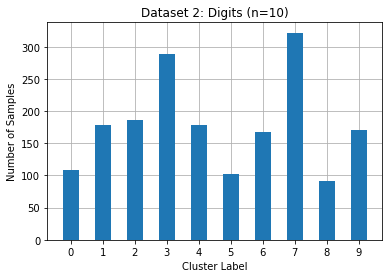

In [74]:
n_best=10
gmm = GaussianMixture(n_components = n_best, random_state = random_seed, max_iter = 1000)
gmm.fit(X)
gmm_labels = gmm.predict(X)

print ("******** EM - gmm (n = 10) ********")
print('BIC: ', gmm.bic(X))
score_gmm = silhouette_score(X, gmm_labels)
print('silhouette_score: ', score_gmm)
ami_gmm = adjusted_mutual_info_score(y, gmm_labels)
print('adjusted_mutual_info_score: ', ami_gmm)

plt.figure()
plt.hist(gmm_labels, bins = np.arange(0,n_best+1)-.5, rwidth = .5, zorder = 2)
plt.xticks(np.arange(0,n_best))
plt.xlabel('Cluster Label')
plt.ylabel('Number of Samples')
plt.title('Dataset 2: Digits (n=10)')
plt.grid()

******** EM - gmm (n = 13) ********
BIC:  220715.39572329557
silhouette_score:  0.1524454522673178
adjusted_mutual_info_score:  0.7238125653179956


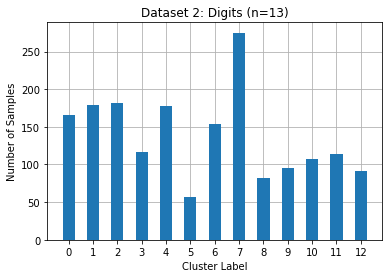

In [76]:
n_best=13
gmm = GaussianMixture(n_components = n_best, random_state = random_seed, max_iter = 1000)
gmm.fit(X)
gmm_labels = gmm.predict(X)

print ("******** EM - gmm (n = 13) ********")
print('BIC: ', gmm.bic(X))
score_gmm = silhouette_score(X, gmm_labels)
print('silhouette_score: ', score_gmm)
ami_gmm = adjusted_mutual_info_score(y, gmm_labels)
print('adjusted_mutual_info_score: ', ami_gmm)

plt.figure()
plt.hist(gmm_labels, bins = np.arange(0,n_best+1)-.5, rwidth = .5, zorder = 2)
plt.xticks(np.arange(0,n_best))
plt.xlabel('Cluster Label')
plt.ylabel('Number of Samples')
plt.title('Dataset 2: Digits (n=13)')
plt.grid()

******** EM - gmm (n = 15) ********
BIC:  230820.24869950456
silhouette_score:  0.16156266961594948
adjusted_mutual_info_score:  0.7346143893411947


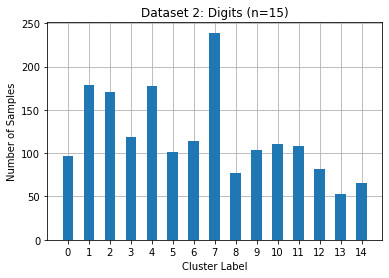

In [77]:
n_best=15
gmm = GaussianMixture(n_components = n_best, random_state = random_seed, max_iter = 1000)
gmm.fit(X)
gmm_labels = gmm.predict(X)

print ("******** EM - gmm (n = 15) ********")
print('BIC: ', gmm.bic(X))
score_gmm = silhouette_score(X, gmm_labels)
print('silhouette_score: ', score_gmm)
ami_gmm = adjusted_mutual_info_score(y, gmm_labels)
print('adjusted_mutual_info_score: ', ami_gmm)

plt.figure()
plt.hist(gmm_labels, bins = np.arange(0,n_best+1)-.5, rwidth = .5, zorder = 2)
plt.xticks(np.arange(0,n_best))
plt.xlabel('Cluster Label')
plt.ylabel('Number of Samples')
plt.title('Dataset 2: Digits (n=15)')
plt.grid()

******** EM - gmm (n = 9) ********
BIC:  189490.043444505
silhouette_score:  0.17210861066561478
adjusted_mutual_info_score:  0.7377702343863709


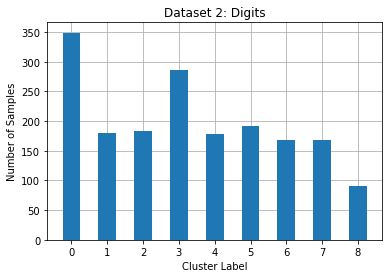

In [50]:
n_best=9
gmm = GaussianMixture(n_components = n_best, random_state = random_seed, max_iter = 1000)
gmm.fit(X)
gmm_labels = gmm.predict(X)

print ("******** EM - gmm (n = 9) ********")
print('BIC: ', gmm.bic(X))
score_gmm = silhouette_score(X, gmm_labels)
print('silhouette_score: ', score_gmm)
ami_gmm = adjusted_mutual_info_score(y, gmm_labels)
print('adjusted_mutual_info_score: ', ami_gmm)

plt.figure()
plt.hist(gmm_labels, bins = np.arange(0,n_best+1)-.5, rwidth = .5, zorder = 2)
plt.xticks(np.arange(0,n_best))
plt.xlabel('Cluster Label')
plt.ylabel('Number of Samples')
plt.title('Dataset 2: Digits')
plt.grid()

******** EM - gmm (n = 12) ********
BIC:  220002.6228300863
silhouette_score:  0.1607940573839033
adjusted_mutual_info_score:  0.7391057882785145


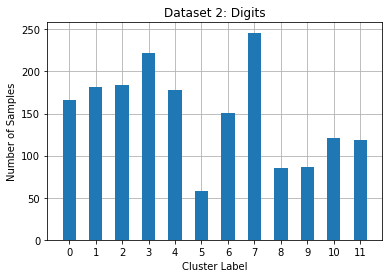

In [51]:
n_best=12
gmm = GaussianMixture(n_components = n_best, random_state = random_seed, max_iter = 1000)
gmm.fit(X)
gmm_labels = gmm.predict(X)

print ("******** EM - gmm (n = 12) ********")
print('BIC: ', gmm.bic(X))
score_gmm = silhouette_score(X, gmm_labels)
print('silhouette_score: ', score_gmm)
ami_gmm = adjusted_mutual_info_score(y, gmm_labels)
print('adjusted_mutual_info_score: ', ami_gmm)

plt.figure()
plt.hist(gmm_labels, bins = np.arange(0,n_best+1)-.5, rwidth = .5, zorder = 2)
plt.xticks(np.arange(0,n_best))
plt.xlabel('Cluster Label')
plt.ylabel('Number of Samples')
plt.title('Dataset 2: Digits')
plt.grid()

******** EM - gmm (n = 14) ********
BIC:  224342.05312163153
silhouette_score:  0.16222918523503269
adjusted_mutual_info_score:  0.7286596115477063


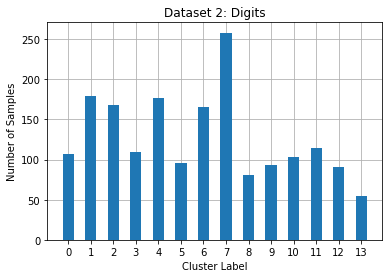

In [52]:
n_best=14
gmm = GaussianMixture(n_components = n_best, random_state = random_seed, max_iter = 1000)
gmm.fit(X)
gmm_labels = gmm.predict(X)

print ("******** EM - gmm (n = 14) ********")
print('BIC: ', gmm.bic(X))
score_gmm = silhouette_score(X, gmm_labels)
print('silhouette_score: ', score_gmm)
ami_gmm = adjusted_mutual_info_score(y, gmm_labels)
print('adjusted_mutual_info_score: ', ami_gmm)

plt.figure()
plt.hist(gmm_labels, bins = np.arange(0,n_best+1)-.5, rwidth = .5, zorder = 2)
plt.xticks(np.arange(0,n_best))
plt.xlabel('Cluster Label')
plt.ylabel('Number of Samples')
plt.title('Dataset 2: Digits')
plt.grid()